### Data Exploration

In [64]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read Indeed Dataset and store into Pandas data frame
indeed_df = pd.read_csv("./indeed_job_dataset.csv")
indeed_df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,3.7,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.9,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
indeed_df.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

#### Removing the following columns
* Link column
* Date since posted
* Description

In [8]:
# Dropping unusable columns
indeed_df = indeed_df.drop(columns = ["Unnamed: 0", "Link", "Date_Since_Posted", "Description"])

In [23]:
# Checking DataFrame
indeed_df.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,TX,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,OR,NaN,...,0,0,0,1,0,0,0,0,0,0
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,DC,NaN,...,0,1,0,0,0,0,0,0,0,1
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,TX,NaN,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# Seperating my rows to clean
suzy_col = indeed_df.loc[:, ['No_of_Reviews','Company_Industry', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries']]

In [28]:
# Checking DataFrame
suzy_col

,No_of_Reviews,Company_Industry,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,3301.0,Health Care,0,0,0,0,0,1,0,0,0,1,0,0
1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
2,62.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0
3,158.0,Government,0,0,0,1,0,0,0,0,0,0,0,1
4,495.0,Banks and Financial Services,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
5711,31.0,Human Resources and Staffing,0,0,0,0,0,0,0,0,0,0,0,1
5712,21159.0,Banks and Financial Services,0,0,0,0,0,1,0,0,1,0,0,0
5713,6791.0,Banks and Financial Services,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
# Filling compant industry NaNs
suzy_col['Company_Industry'] = suzy_col['Company_Industry'].fillna('Not Listed')

In [32]:
# Filling No_of_Reviews NaNs
suzy_col['No_of_Reviews'] = suzy_col['No_of_Reviews'].fillna('0')

In [71]:
suzy_col.to_csv('./SuzyColumns.csv')

### Exploring my set of columns


0        3301.0
2          62.0
3         158.0
4         495.0
5         173.0
         ...   
5708       40.0
5711       31.0
5712    21159.0
5713     6791.0
5714     2279.0
Name: No_of_Reviews, Length: 4753, dtype: object

In [45]:
# Exploring usable data - 'No_of_Reviews'
suzy_col.loc[suzy_col['No_of_Reviews']!= '0', :]['No_of_Reviews'].count()

4753

In [46]:
# Exploring usable data - 'Company_Industry'
suzy_col.loc[suzy_col['Company_Industry']!= 'Not Listed', :]['Company_Industry'].count()

3826

In [50]:
# Exploring usable data - 'IL'
suzy_col['IL'].sum()

240

In [51]:
# Exploring usable data - 'WA'
suzy_col['WA'].sum()

222

In [52]:
# Exploring usable data 
suzy_col['MD'].sum()

169

In [53]:
# Exploring usable data 
suzy_col['DC'].sum()

140

In [54]:
# Exploring usable data 
suzy_col['NC'].sum()

139

In [55]:
# Exploring usable data 
suzy_col['Other_states'].sum()

1623

In [56]:
# Exploring usable data 
suzy_col['Consulting and Business Services'].sum()

733

In [57]:
# Exploring usable data 
suzy_col['Internet and Software'].sum()

647

In [59]:
# Exploring usable data 
suzy_col['Banks and Financial Services'].sum()

459

In [60]:
# Exploring usable data 
suzy_col['Health Care'].sum()

339

In [61]:
# Exploring usable data 
suzy_col['Insurance'].sum()

227

In [63]:
# Exploring usable data 
suzy_col['Other_industries'].sum()

1421

In [69]:
# Test
suzy_col.loc[suzy_col['No_of_Reviews']!= '0', 'No_of_Reviews']

0        3301.0
2          62.0
3         158.0
4         495.0
5         173.0
         ...   
5708       40.0
5711       31.0
5712    21159.0
5713     6791.0
5714     2279.0
Name: No_of_Reviews, Length: 4753, dtype: object

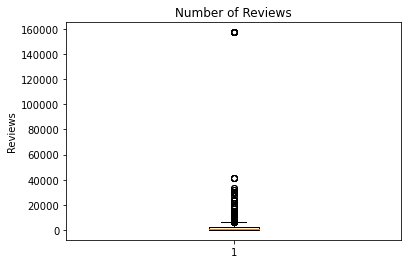

In [70]:
reviews = suzy_col.loc[suzy_col['No_of_Reviews']!= '0', 'No_of_Reviews']

fig1, ax1 = plt.subplots()
ax1.set_title('Number of Reviews')
ax1.set_ylabel('Reviews')
ax1.boxplot(reviews)

# Saving figure
plt.savefig("./Number of Reviews.png")

# Showing image
plt.show()